In [131]:
import numpy as np

def txt_to_array(filename, sep = ","):
    """
    Input:
    filename (str): the text file containing a matrix
    which we want to read.

    Output:
    A numpy array of the matrix.
    """
    inputfile = open(filename,'r+')
    file_lines = inputfile.readlines()

    mat = []
    for line in file_lines:
        mat.append(line.strip().split(sep))
    mat = np.array(mat).astype(np.float)
    return mat

# We use the previous function to read the neutrino covariance matrix used in the
# chi2 test and the reconstruction matrix, which is used to transform from real
# energies to reconstruted energies.
neutrino_covariance_matrix = txt_to_array("NeutrinoCovMatrix.dat")
reconstruct_mat = txt_to_array("ReconstructMatrix.dat")

def FindFineBinIndex(energy):
    """
    Input:
    energy (float): prompt energy or neutrino true energy.

    Output:
    An integer telling us the index of the true_energy_bin_centers
    bin in which the input energy is found.
    """
    deltaEfine = 0.05
    dindex = np.int(np.floor(energy/deltaEfine))
    if dindex<0:
        return 0
    else:
        return dindex
    
def get_true_energy_bin_centers():
    """
    This function divides the whole reconstructed energy spectrum in
    the energy intervals which the experiment is capable to resolve.
    The resolution is given by deltaEfine (here, 0.05 MeV).
    This energy will allow neutrino energies from 0.78 MeV to 12.78 MeV (after
    summing 0.78 MeV in the function), approximately.

    Output:
    returns a numpy array (the same length as the resolution
    matrix) with the center of the bins of the resolution of the experiment.
    """
    enutrue = []
    deltaEfine = 0.05
    for i in range(0,241):
        enutrue.append((i)*deltaEfine)
    return enutrue

In [118]:
datlowerbin = np.array([0.7,1.3,1.5,1.7,1.9,2.1,2.3,2.5,2.7,2.9,3.1,3.3,3.5,3.7,3.9,4.1,4.3,4.5,
               4.7,4.9,5.1,5.3,5.5,5.7,5.9,6.1,6.3,6.5,6.7,6.9,7.1,7.3,7.5,7.7,7.9])
datupperbin = np.array([1.3,1.5,1.7,1.9,2.1,2.3,2.5,2.7,2.9,3.1,3.3,3.5,3.7,3.9,4.1,4.3,4.5,4.7,
               4.9,5.1,5.3,5.5,5.7,5.9,6.1,6.3,6.5,6.7,6.9,7.1,7.3,7.5,7.7,7.9,12.0])
nulowerbin = np.array([1.800, 2.125, 2.375, 2.625, 2.875, 3.125, 3.375, 3.625, 3.875, 4.125, 4.375, 4.625, 4.875,
              5.125, 5.375, 5.625, 5.875, 6.125, 6.375, 6.625, 6.875, 7.125, 7.375, 7.625, 7.875, 8.125])
nuupperbin = np.array([2.125, 2.375, 2.625, 2.875, 3.125, 3.375, 3.625, 3.875, 4.125, 4.375, 4.625, 4.875, 5.125,
              5.375, 5.625, 5.875, 6.125, 6.375, 6.625, 6.875, 7.125, 7.375, 7.625, 7.875, 8.125, 12.00])

In [128]:
#reconstruct_mat first index is prompt energy, second index is true energy
lentrue = len(nulowerbin)
lenrec = len(datlowerbin)
mat = np.zeros((lenrec,lentrue))
for i in range(0,lenrec):
    minrec = FindFineBinIndex(datlowerbin[i])
    maxrec = FindFineBinIndex(datupperbin[i])
    for j in range(0,lentrue):
        mintrue = FindFineBinIndex(nulowerbin[j])
        maxtrue = FindFineBinIndex(nuupperbin[j])
        mat[i,j] = np.mean(reconstruct_mat[minrec:maxrec,mintrue:maxtrue]) 


In [71]:
import matplotlib.pyplot as plt

In [133]:
np.linalg.det(reconstruct_mat)

0.0

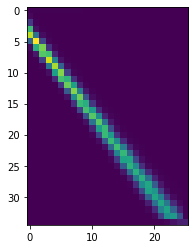

In [129]:
plt.imshow(mat)

In [11]:
mat[30,25]

0.0